In [40]:
import pandas as pd
import statsmodels.api as sm

In [64]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1.) Import Data from FRED

In [67]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [68]:
data.index = pd.to_datetime(data.index)

In [69]:
data.dropna(inplace = True)

In [70]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [71]:
split1 = int(len(data)*0.6)
split2 = int(len(data)*0.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [72]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [73]:
# Add Constants
X_in = sm.add_constant(X_in) # Add a constant to the model 
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 通过添加常数列，模型会在拟合时考虑到截距项。它可以用于确保线性回归模型包含常数项，从而更准确地拟合数据。

In [74]:
X_in.head()

,const,Unemployment,HousingStarts,Inflation
1959-01-01,1.0,6.0,1657.0,29.01
1959-02-01,1.0,5.9,1667.0,29.00
1959-03-01,1.0,5.6,1620.0,28.97
1959-04-01,1.0,5.2,1590.0,28.98
1959-05-01,1.0,5.1,1498.0,29.04


In [75]:
X_out.head()

,const,Unemployment,HousingStarts,Inflation
1997-12-01,1.0,4.7,1566.0,161.8
1998-01-01,1.0,4.6,1525.0,162.0
1998-02-01,1.0,4.6,1584.0,162.0
1998-03-01,1.0,4.7,1567.0,162.0
1998-04-01,1.0,4.3,1540.0,162.2


# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [76]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [77]:
import matplotlib.pyplot as plt

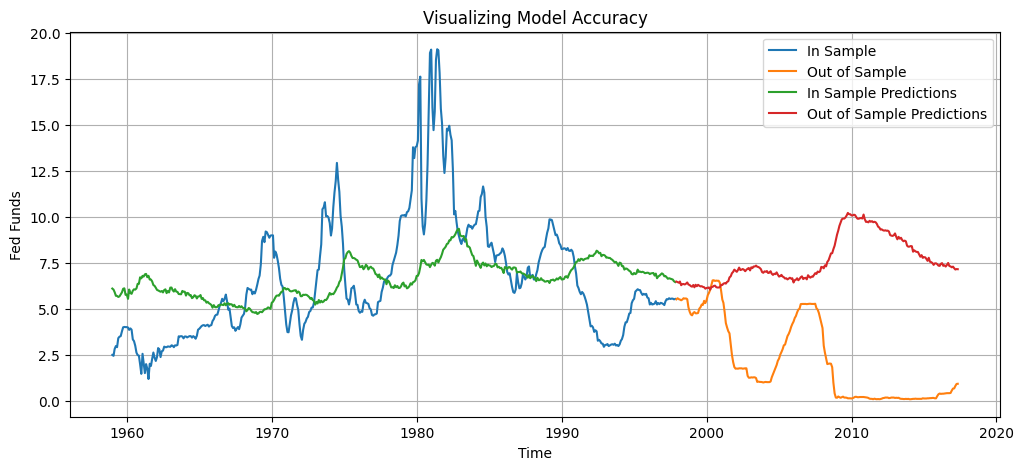

In [78]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In Sample", "Out of Sample", "In Sample Predictions", "Out of Sample Predictions"])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [81]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
max_degree = 3

__________________________
DEGREES:  1
Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566712
__________________________


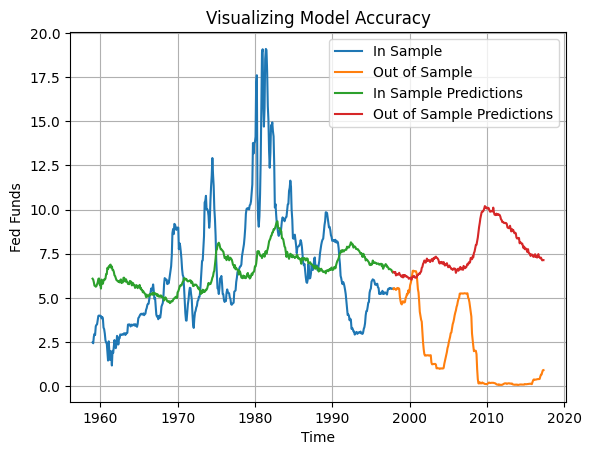

__________________________
DEGREES:  2
Insample MSE :  3.863477139276068
Outsample MSE :  481.44650991740434
__________________________


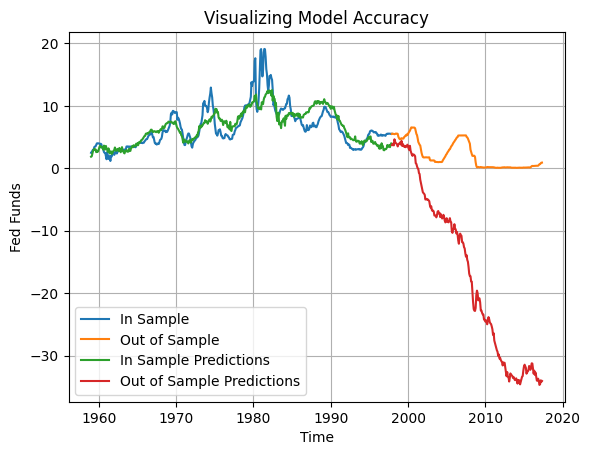

__________________________
DEGREES:  3
Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945
__________________________


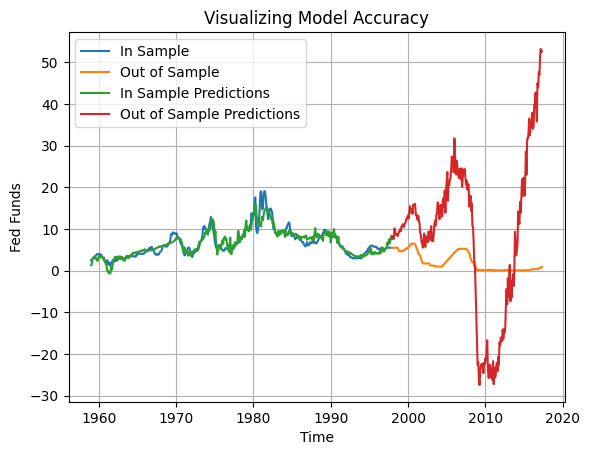

In [84]:
for degree in range(1, 1+max_degree):
    print("__________________________")
    print("DEGREES: ", degree)
    poly = PolynomialFeatures(degree = degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out) 

    # Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()

    # Q4
    plt.figure

    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    # Q5
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("__________________________")

    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In Sample", "Out of Sample", "In Sample Predictions", "Out of Sample Predictions"])
    plt.grid()
    plt.show()


In [4]:
# PolynomialFeatures的使用示例

# PolynomialFeatures是一个用于生成多项式和交互特征的类。PolynomialFeatures的构造函数有三个参数：
# degree：控制多项式的最高次数
# interaction_only：默认为False，如果指定为True，那么就不会有x1^2这种项，只有x1*x2这种交互项
# include_bias：默认为True，如果为True的话，那么就会有常数项，就是x0^0这一项

import numpy as np

# 创建一个简单的数据集
X = np.array([[1, 2], [3, 4], [5, 6]])

# 创建PolynomialFeatures对象
poly = PolynomialFeatures(degree=2)

# 对数据集进行多项式特征转换
X_poly = poly.fit_transform(X)

# X_poly包含了原始特征的多项式组合
print(X_poly)

[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]


# 7.) State your observations :

${\alpha}^2$

- According to the plots above, the greater the degree of the polynomial, the better the model fits the In-sample data, but the worse it fits the Out-of-sample data. This is a clear example of overfitting.    
- When the degree is 2 and 3, the model is overfitting the data and cannot generalize well to out-of-sample data.   
- When the degree is 1, the model is a little bit underfitting.